### Import necesary libraries  

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import sys 

# add the path to the module to the system path 
sys.path.insert(0, os.path.join('..', 'src'))

from data_preprocessing import CleanerData

#visual settings 
plt.style.use('seaborn-v0_8-whitegrid')

sns.set_palette('Set2')

### Import data 

In [2]:
base_path = os.path.join('..', 'data', 'raw')
file_name = 'vehicles.csv'

path = os.path.join(base_path, file_name)

df = pd.read_csv(path)

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


### Initial data exploration 

In [3]:
print('Shape of the data:', df.shape)

Shape of the data: (426880, 26)


In [4]:
# info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
#numeric statistics 
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
# check for missing values 
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
#check for duplicates 
df.duplicated().sum()

np.int64(0)

### Cleaning the data

In [8]:
# convert object columns to category 

for col in df.columns: 
    if df[col].dtype == 'object': 
        df[col] = df[col].astype('category')

df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  category
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  category
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [9]:
# check the max and min price of the cars

print(f"Max and min price of the cars: Max={df['price'].max()} - Min={df['price'].min()}" )
print("Shape of the data:", df.shape) 

Max and min price of the cars: Max=3736928711 - Min=0
Shape of the data: (426880, 26)


In [10]:
# Cleaning the data, we will remove the outliers from the price column, and select only the cars with a price between 1000 and 100000

df = CleanerData.remove_outliers_with_min_max(df, 'price', 1000, 100000)

print(f"New max and min price of the cars: Max={df['price'].max()} - Min={df['price'].min()}" )
print("New shape of the data:", df.shape) 

New max and min price of the cars: Max=100000 - Min=1000
New shape of the data: (379910, 26)


In [12]:
# Select only the cars with a year bigger than 2000 

df = CleanerData.remove_outliers_with_min_max(df, 'year', 2000, 2025)

print("Nan values in the year column:", df['year'].isnull().sum())
print("New shape of the data:", df.shape) 

Nan values in the year column: 0
New shape of the data: (355127, 26)


In [13]:
# Convert the year column to int 
df['year'] = df['year'].astype('int')

df['year'].dtype

dtype('int64')

In [15]:
# Remove nan values from the odometer column 
df = df[df['odometer'].notna()]

print("Nan values in the odometer column:", df['odometer'].isnull().sum())
print("New shape of the data:", df.shape) 

Nan values in the odometer column: 0
New shape of the data: (353168, 26)


In [16]:
#Check the max and min odometer of the cars 
print(f"Max and min odometer of the cars: Max={df['odometer'].max()} - Min={df['odometer'].min()}" )

Max and min odometer of the cars: Max=10000000.0 - Min=0.0


In [17]:
# we'll check if other columns have Nan values 

print("Nan values in the data:", df.isnull().sum())

Nan values in the data: id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     10637
model             2946
condition       134999
cylinders       147019
fuel              2070
odometer             0
title_status      5956
transmission      1485
VIN             125722
drive           106647
size            256682
type             71759
paint_color      99831
image_url            0
description          2
county          353168
state                0
lat               3319
long              3319
posting_date         0
dtype: int64


In [18]:
# we still have a lot of columns with nan values, initially let's drop not important columns 
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'image_url', 'description', 'county', 'state', 'posting_date', 'VIN'])

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,32.590,-85.4800
28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,32.590,-85.4800
29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,32.590,-85.4800
30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,32.590,-85.4800
31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,32.592,-85.5189


In [20]:
df.isnull().sum()

price                0
year                 0
manufacturer     10637
model             2946
condition       134999
cylinders       147019
fuel              2070
odometer             0
title_status      5956
transmission      1485
drive           106647
size            256682
type             71759
paint_color      99831
lat               3319
long              3319
dtype: int64

In [27]:
# drop duplicated columns 
df = df.drop_duplicates()
print("Shape of the data after dropping duplicates:", df.shape)

Shape of the data after dropping duplicates: (257938, 16)


In [29]:
# let's save the cleaned data to a new csv file 
cleaned_base_path = os.path.join('..', 'data', 'processed')

if not os.path.exists(cleaned_base_path): 
    os.makedirs(cleaned_base_path)

df.to_csv(os.path.join(cleaned_base_path, 'cleaned_v1.csv'), index=False)

### Part two of cleaning data 

In [3]:
df = pd.read_csv(os.path.join('..', 'data', 'processed', 'cleaned_v1.csv'))

# check the data again 
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,32.590,-85.4800
1,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,32.590,-85.4800
2,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,32.590,-85.4800
3,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,32.590,-85.4800
4,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,32.592,-85.5189


In [4]:
# Fix dtypes 
df = CleanerData.convert_columns_to_specified_type(df, 'object', 'category')

df.dtypes

price              int64
year               int64
manufacturer    category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
lat              float64
long             float64
dtype: object

In [5]:
df.isnull().sum()

price                0
year                 0
manufacturer      7960
model             1993
condition        81309
cylinders       103873
fuel              1211
odometer             0
title_status      3050
transmission       853
drive            79049
size            183688
type             51423
paint_color      67623
lat               1145
long              1145
dtype: int64

In [7]:
# The column cylinders has a lot of nan values, let's check the unique values in this column 
print("Unique values in the cylinders column:\n", df['cylinders'].unique()) 

print('\nChecking the value counts for the cylinders column')
print(df['cylinders'].value_counts()) 

print("\nChecking the Nan values in the cylinders column:", df['cylinders'].isnull().sum())


Unique values in the cylinders column:
 ['8 cylinders', '6 cylinders', NaN, '4 cylinders', '5 cylinders', '3 cylinders', '10 cylinders', 'other', '12 cylinders']
Categories (8, object): ['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']

Checking the value counts for the cylinders column
cylinders
6 cylinders     62483
4 cylinders     49797
8 cylinders     38888
5 cylinders      1216
other             660
10 cylinders      580
3 cylinders       355
12 cylinders       86
Name: count, dtype: int64

Checking the Nan values in the cylinders column: 103873


In [ ]:
# we will replace the nan values in the cylinders column with 'not specified'. we also need to create a new category for this value. 
if 'not specified' not in df['cylinders'].cat.categories: 
    df['cylinders'] = df['cylinders'].cat.add_categories('not specified')

df['cylinders'] = df['cylinders'].fillna('not specified')

df['cylinders'].isnull().sum()

#later we will verify if the cylinders column has a correlation with the price of the car, then we can revert the category that we added to the column. 

np.int64(0)

In [12]:
# The column condition also has a lot of nan values, let's check the unique values in this column 

print("Unique values in the condition column:\n", df['condition'].unique()) 

print('\nChecking the value counts for the condition column')
print(df['condition'].value_counts()) 

print("\nChecking the Nan values in the condition column:", df['condition'].isnull().sum())


Unique values in the condition column:
 ['good', 'excellent', 'fair', 'like new', NaN, 'new', 'salvage']
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

Checking the value counts for the condition column
condition
good         95727
excellent    61563
like new     14530
fair          3714
new            771
salvage        324
Name: count, dtype: int64

Checking the Nan values in the condition column: 81309


C:\Users\luizh\AppData\Local\Temp\ipykernel_19408\3602125711.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('condition')['price'].mean().plot(kind='bar')


[]

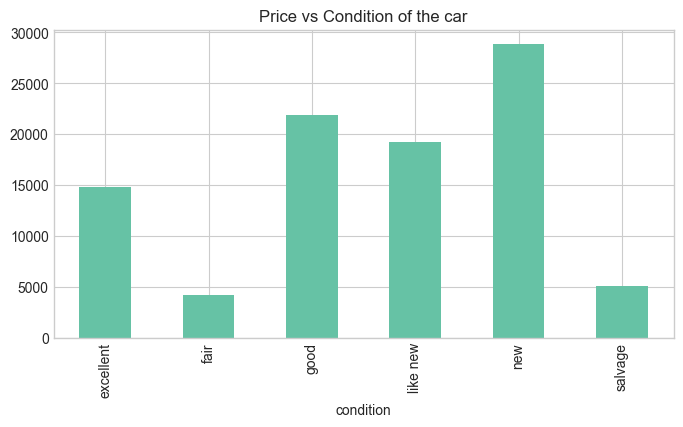

In [18]:
# we can plot the relation between the condition and the price of the car to verify if the condition has a correlation with the price of the car  
# check the mean price of the car for each condition 

plt.figure(figsize=(8, 4))

df.groupby('condition')['price'].mean().plot(kind='bar')
plt.title('Price vs Condition of the car')
plt.plot()

C:\Users\luizh\AppData\Local\Temp\ipykernel_19408\944002908.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('condition')['price'].mean().plot(kind='bar')


[]

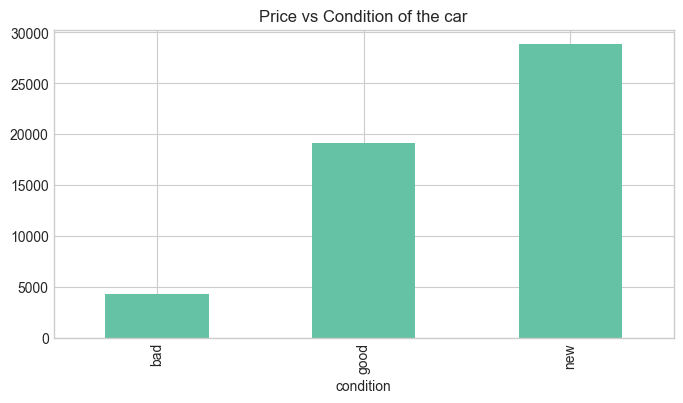

In [20]:
# the graph below shows that the columns excellent, good and like new are similar, so we can merge them into one category called 'good'. The columns 
# fair and salvage are also similar, we will merge them into one category called 'bad'. 
df['condition'] = df['condition'].replace({
    'excellent': 'good', 
    'like new': 'good', 
    'fair': 'bad', 
    'salvage': 'bad'
})

# plot the unique values in the condition column again 

plt.figure(figsize=(8, 4))

df.groupby('condition')['price'].mean().plot(kind='bar')
plt.title('Price vs Condition of the car')
plt.plot()